# 00. Contents

### 01. Importing libraries

### 02. Importing data set

### 03. Visual exploration of data

### 04. Linear regression

# 01. Importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 02. Importing data set

In [6]:
# Creating a path

path = r'/Users/agne/Documents/Studies/Data Analysis/Study Materials/Advanced Analytics'

In [8]:
df_income = pd.read_csv(os.path.join(path, '6.1 Sourcing the Data', 'cleaned_income.csv'), index_col=False)

In [10]:
# Dropping the Unnamed column

df_income.drop(columns = ['Unnamed: 0'], inplace=True)

In [12]:
df_income.head()

,County,State,FIPS,State FIPS Code,County FIPS Code,Total Population,Median Household Income,Urban-Rural
0,Autauga County,Alabama,1001,1,1,59285,69841,Urban
1,Baldwin County,Alabama,1003,1,3,239945,75019,Urban
2,Barbour County,Alabama,1005,1,5,24757,44290,Rural
3,Bibb County,Alabama,1007,1,7,22152,51215,Rural
4,Blount County,Alabama,1009,1,9,59292,61096,Urban


# 03. Visual exploration of data

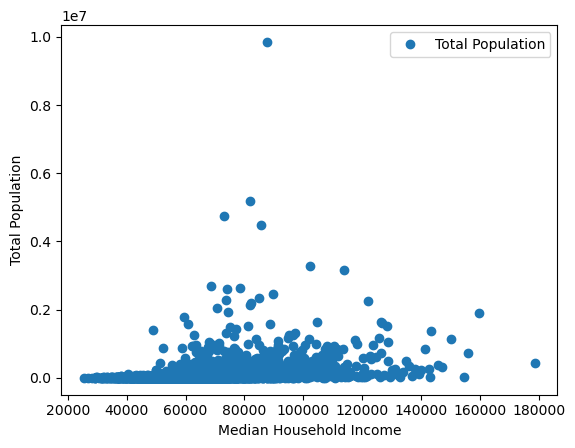

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_income.plot(x = 'Median Household Income', y='Total Population',style='o')
plt.xlabel('Median Household Income')  
plt.ylabel('Total Population')  
plt.show()

There seems to be no connection between median household income and total population. As my hypothesis has to be the opposite of that assumption, I believe it should be: There is a strong connection between median household income and the total population numbers in each US county.

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_income['Median Household Income'].values.reshape(-1,1)
y = df_income['Total Population'].values.reshape(-1,1)

In [24]:
X

array([[69841],
       [75019],
       [44290],
       ...,
       [82672],
       [62648],
       [87545]])

In [26]:
y

array([[ 59285],
       [239945],
       [ 24757],
       ...,
       [ 20605],
       [  7708],
       [  6835]])

In [32]:
# Spliting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 04. Linear regression

In [34]:
# Creating a regression object.

regression = LinearRegression()

In [36]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

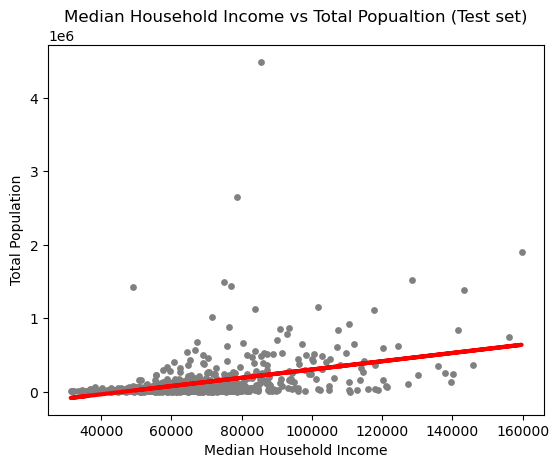

In [40]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Median Household Income vs Total Popualtion (Test set)')
plot_test.xlabel('Median Household Income')
plot_test.ylabel('Total Population')
plot_test.show()

The line doesn't seem to fit the data points too well. They are a little bit too scattered for it to be fully accurate.

In [43]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [45]:
# Printing the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.63591103]]
Mean squared error:  53255300585.85357
R2 score:  0.1561330185760098


In [47]:
y_predicted

array([[ 2.11089359e+04],
       [ 1.11706206e+05],
       [ 6.81518853e+04],
       [ 1.24144661e+05],
       [ 1.92953499e+05],
       [ 1.47635139e+05],
       [ 9.06053549e+04],
       [ 8.61304415e+04],
       [-1.21598469e+04],
       [ 3.08759697e+04],
       [ 1.03539771e+05],
       [ 4.23039567e+05],
       [ 1.34351296e+05],
       [-1.28756076e+04],
       [ 1.68905067e+05],
       [ 5.78325322e+04],
       [ 8.91625616e+04],
       [ 5.79734300e+04],
       [ 7.46388189e+04],
       [ 7.62337817e+04],
       [ 1.15200471e+05],
       [ 9.84899944e+04],
       [ 6.34740792e+04],
       [ 1.71739930e+05],
       [ 1.49077932e+05],
       [ 1.52205862e+05],
       [-1.37834911e+03],
       [ 1.40066110e+05],
       [ 8.70378232e+04],
       [ 2.18608166e+05],
       [ 1.28957729e+05],
       [ 1.49314640e+05],
       [ 2.62488868e+04],
       [ 1.43380026e+05],
       [ 1.22786407e+05],
       [ 3.17901647e+05],
       [ 4.24126796e+04],
       [ 8.42311395e+04],
       [ 5.0

In [49]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,43161,21108.935916
1,34736,111706.205785
2,30145,68151.885316
3,20867,124144.661437
4,24774,192953.499250
5,323673,147635.138627
6,267731,90605.354875
7,8459,86130.441514
8,11075,-12159.846917
9,21441,30875.969737


Looks like the model performed quite poorly. The predicted values do not match the actual ones at all. The r2 is only 0.156, which means the model is not accurate at all. The mean squared error is very high, meaning the linear regression model is unsuitable for this analysis.